In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv

# The bathymetry

Configure the extent 

In [2]:
bathymetry_extent = {
    "xmin" : 90, 
    "xmax" :  325.83,
    "ymin" :  -85,
    "ymax" : 85,
}

In [3]:
nami_extent = {
    "xmin" : 90,
    "xmax" : 325.83,
    "ymin" : -60,
    "ymax" : 70,
}

Bathymetry resolution

Read bathymetry

In [4]:
bathymetry_raw = np.fromfile(f'../../03_biobio2010/data/bathymetry3min',dtype='float64')
bathymetry_shape = np.asarray(bathymetry_raw[:2], dtype=int)    
bathymetry_raw = bathymetry_raw[2:]
bathymetry_raw = bathymetry_raw.reshape(bathymetry_shape)

In [5]:
bathymetry_raw.shape

(3400, 4717)

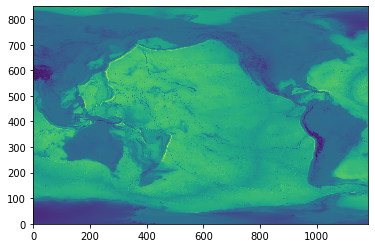

In [6]:
plt.pcolormesh(bathymetry_raw[::4, ::4])

Trim parts of the bathymetry not in the domain of Nami

In [7]:
ds_original = 3

In [8]:
lat_start_index = int((nami_extent["ymin"] - bathymetry_extent["ymin"])/(ds_original/60))
lat_end_index = bathymetry_shape[0] - int((bathymetry_extent["ymax"] - nami_extent["ymax"])/(ds_original/60))
lon_start_index = int((nami_extent["xmin"] - bathymetry_extent["xmin"])/(ds_original/60))
lon_end_index = bathymetry_shape[1] - int((bathymetry_extent["xmax"] - nami_extent["xmax"])/(ds_original/60))-1
print(f"lat_start_index={lat_start_index}")
print(f"lat_end_index={lat_end_index}")
print(f"lon_start_index={lon_start_index }")
print(f"lon_end_index={ lon_end_index }")

lat_start_index=500
lat_end_index=3100
lon_start_index=0
lon_end_index=4716


In [9]:
skip = 10
bathymetry = bathymetry_raw[lat_start_index:lat_end_index,lon_start_index:lon_end_index]
bathymetry = bathymetry[::skip, ::skip][:,:-1]
nlat, nlon = bathymetry.shape
print(f"nlat = {nlat}, nlon = {nlon}")

nlat = 260, nlon = 471


In [ ]:
plt.pcolormesh(bathymetry[::4, ::4])
plt.colorbar()

# Read max heights and arrival

In [ ]:
def read_large_nami_csv(path):
    reader = csv.reader(open(path))

    for row in reader:
        continue

    return np.array(row, dtype=float)

In [ ]:
nami_folder = "../nami"

In [ ]:
hmax_unmasked = read_large_nami_csv(f"{nami_folder}/tlab2D.csv").reshape((nlat,-1))

In [ ]:
harr_unmasked = read_large_nami_csv(f"{nami_folder}/tlab2D (1).csv").reshape((nlat,-1))

harr = np.ma.masked_where(bathymetry<500, harr_unmasked)
hmax = np.ma.masked_where(bathymetry<10, hmax_unmasked)

In [ ]:
plt.plot(hmax_unmasked.ravel())

In [ ]:
np.percentile(hmax_unmasked.ravel(), 90)

In [ ]:
x = np.linspace(nami_extent["xmin"], nami_extent["xmax"], nlon)
y = np.linspace(nami_extent["ymin"], nami_extent["ymax"], nlat)
x, y = np.meshgrid(x, y)

Pois locations

In [ ]:
[21418,32411,51407,55012]

In [ ]:
pois={
    21414: [178.219,48.968],
    21419: [155.717,44.435],
    21401: [152.583,42.617],
    21418: [148.645,38.727],
    21413: [152.132,30.533],
    52403: [145.52,4.02],
    52406: [164.977,-5.307],
    55012: [158.453,-15.664],
    51425: [183.68,-9.517],
    51407: [203.455,19.57],
    46404: [231.267,45.853],
    46407: [231.168,42.682],
    46411: [232.933,39.333],
    46412: [239.437,32.492],
    43412: [253.03300000000002,16.045],
    43413: [259.91700000000003,11.012],
    32411: [269.12,4.953],
    32412: [273.626,-17.984],
    32413: [266.483,-7.406],
    32401: [286.579,-20.474],
}
darts_ids = [21413, 32412, 43412, 46404, 46407, 46411, 46412, 51425, 52403]# [21418,32411,51407,55012]
# darts_ids = [21413, 32412, 43412, 46404, 46407, 46411, 46412, 51425, 52403, 21418,32411,51407,55012]

In [ ]:
dart_locations = np.array(list(pois.values()))

In [ ]:
s = 10 #skip size


f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)

p = ax1.pcolormesh(x[::s,::s],y[::s,::s],hmax[::s,::s],vmax=1,vmin=0, cmap=plt.cm.Reds, shading="nearest")
divider = make_axes_locatable(ax1)

for  dart in darts_ids:
    
    [lon, lat] = pois[dart]
    ax1.scatter([lon],[lat],color='white',edgecolor='green',marker='o', s=100)
    ax1.annotate('%s'%dart, [lon+0.1,lat])
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = f.colorbar(p,cax)
cbar.set_label('Max Height (m)')

ax1.contour(x[::s,::s],y[::s,::s], bathymetry[::s,::s], [10], linewidths=1, alpha=0.5, colors='grey')
CS = ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,np.arange(0,24,4),colors='k')
ax1.clabel(CS, inline=1, fontsize=10, fmt='%i h')
ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,
            np.arange(0,24,1),colors='k', linewidths=0.5, alpha=0.5)

ax1.set_aspect(1)
ax1.set_xlabel('lon °')
ax1.set_ylabel('lat °')
f.savefig('energy2010.png',dpi=300,bbox_inches='tight')

In [ ]:
x.min(),x.max()

# Time series

Read Nami time series

In [ ]:
nami = pd.read_json(f"{nami_folder}/pois")

Check that the pixels make sense

In [ ]:
nami

In [ ]:
ds = 3

In [ ]:
for i, buoy in enumerate(nami.keys()):
    buoy_lon, buoy_lat = nami[buoy]["location"]
    buoy_lon_pixel, buoy_lat_pixel = nami[buoy]["pixel"]
    lon_pixel = buoy_lon_pixel * ds*skip/60 + nami_extent["xmin"]
    lat_pixel = buoy_lat_pixel * ds*skip/60 + nami_extent["ymin"]  
    p0 = np.array([buoy_lon, buoy_lat])
    p1 = np.array([lon_pixel, lat_pixel])
    distance = np.linalg.norm(p0-p1, 2)
    plt.scatter([i], [distance])

    print(f"{buoy_lon, lon_pixel}, {buoy_lat, lat_pixel}")
plt.xlabel("buoy index")
plt.ylabel("distance")
plt.title("pixel vs real")


Read Easywave time series

In [ ]:
ls ../easywave

In [ ]:
ewave = pd.read_csv('../easywave/eWave.poi.ssh', delim_whitespace=True)

Read DART buoys time series

In [ ]:
darts = {}
for dart in darts_ids:
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [ ]:
starts = {
    21418: 0,
    21413:60,
    52403: 260,
    55012: 550,
    51425: 450,
    51407: 800,
    46404: 500,
    46407: 500,
    46411: 500,
    46412: 550,
    43412: 750,
    32412: 1100,
}

In [ ]:
group1 = [32412, 43412, 46412]
group2 = [46411, 46407, 46404]
group3 = [51425, 52403, 21413]
orderedBuoys = [32412, 46411, 51425, 43412, 46407, 52403, 46412, 46404, 21413]
orderedBuoys = [32412, 43412, 46412, 46411, 46407, 51425, 46404, 52403, 21413 ]

In [ ]:
yranges = {
    46411: [-0.05, 0.1],
    46404: [-0.1,0.1]
}

GeoClaw timeseries

In [ ]:
from clawpack.pyclaw.gauges import GaugeSolution
geoclaw = {
    gauge_id : GaugeSolution(gauge_id=gauge_id, path='../geoclaw/_output')
    for gauge_id in orderedBuoys
    
}

Main figure for the paper

In [ ]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6}

matplotlib.rc('font', **font)

In [ ]:
f = plt.figure(figsize=(12 / 1.5, 6 / 1.5))
for i, dart_number in enumerate(orderedBuoys):
    ax = f.add_subplot(3, 3, i + 1)

#     ax.plot(
#         ewave["Minute"] / 60.0,
#         ewave[str(dart_number)],
#         label="easywave",
#         color="#d62728",
#         linewidth=0.5,
#     )
    ax.plot(
        np.array(nami[dart_number].time) / 60 / 60,
        nami[dart_number].surface,
        label="nami",
        linewidth=0.5,
    )
    ax.plot(
        geoclaw[dart_number].t / 60 / 60,
        geoclaw[dart_number].q[3, :],
        color="g",
        linewidth=0.5,
        label="geoclaw",
    )    
    ax.plot(
        darts[dart_number][:, 0] * 24,
        darts[dart_number][:, 1],
        label="dart buoy",
        color="k",
        linewidth=0.5,
    )


    xmin = min(starts[dart_number] / 60, 20)
    xmax = min(starts[dart_number] / 60 + 4, 25)
    ax.set_xlim(xmin, xmax)
    ax.annotate("%s" % dart_number, [0.7, 0.9], xycoords="axes fraction")
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_linewidth(0.5)

    ax.spines["bottom"].set_linewidth(0.5)
    xticks = np.arange(np.ceil(xmin), np.ceil(xmax + 0.5), 1, dtype=int)
    ax.set_xticks(xticks)
#     if dart_number in group1:
#         ax.set_ylim(-0.15, 0.25)
#         ax.set_yticks(np.arange(-0.1, 0.2, 0.1))
#     elif dart_number in group2:
#         ax.set_ylim(-0.05, 0.07)
#         ax.set_yticks(np.arange(-0.05, 0.051, 0.05))

    ax.set_xlabel("hours")
    ax.set_ylabel("meters")


f.tight_layout()
f.subplots_adjust(wspace=0.35)
f.savefig("timeseries2011.png", dpi=300, bbox_inches="tight")

* Easywave y nami son iguales entre sí
* Todos llegan antes que las mediciones
* Geoclaw llega siempre antes que los demás

Fact: Ya hay evidencia de que a medida que se propaga se desfasa por efectos de incompresibilidad y elasticidad del fondo


¿Crece la distancia cuando nos alejamos del origen del terrmoto?

# Peak arrival comparison

In [ ]:
edited_starts = {
    32412: 19,
    43412: 13,
    46412: 10,
    46411: 9,
    46407: 8,
    51425: 8, 
    46404: 8,
    52403: 4, 
    21413: 1
}
ends = {
    32412: 19.5,
    43412: 14,
    46412: 11,
    46411: 11,
    46407: 9.5,
    51425: 9, 
    46404: 9.5,
    52403: 6,     
    21413: 2
}

In [ ]:
def get_max_and_max_loc(t, y, time_to_hours_factor, start=0, end=4):
    t = np.array(t) * time_to_hours_factor
    y = np.array(y)
    is_in_interval = (t > start) * (t < end)
    y_filtered = y[is_in_interval]
    t_filtered = t[is_in_interval]

    if len(t_filtered) == 0:
        return t[-1], y[-1]
    return t_filtered[np.argmax(y_filtered)], np.max(y_filtered)


# def get_max_and_max_loc(t, y, time_to_hours_factor, start=0, end=4):
#     t = np.array(t) * time_to_hours_factor
#     y = np.array(y)
#     is_in_interval = (t > start) * (t < end)
#     y_filtered = y[is_in_interval]
#     t_filtered = t[is_in_interval]

#     index = np.where(y_filtered>0.01)[0][0]
#     return t_filtered[index], y_filtered[index]



In [ ]:
poisid = [buoy for buoy in orderedBuoys]
peaks = {
    "nami": {
        dart_number: get_max_and_max_loc(
            nami[dart_number].time,
            nami[dart_number].surface,
            time_to_hours_factor=1 / 60 / 60,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
#     "easywave": {
#         dart_number: get_max_and_max_loc(
#             ewave["Minute"], ewave[str(dart_number)], time_to_hours_factor=1 / 60,
#             start=edited_starts[dart_number],
#             end=ends[dart_number]
#         )
#         for dart_number in poisid
#     },
    "geoclaw": {
        dart_number: get_max_and_max_loc(
            geoclaw[dart_number].t, geoclaw[dart_number].q[3, :], time_to_hours_factor=1 / 60 / 60,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
    "measurements": {
        dart_number: get_max_and_max_loc(
            darts[dart_number][:, 0], darts[dart_number][:, 1], time_to_hours_factor=24,
            start=edited_starts[dart_number],
            end=ends[dart_number]
        )
        for dart_number in poisid
    },
}

In [ ]:
times = {
    model: np.array([
        peaks[model][dart_number][0]
        for dart_number in poisid
    ])
    for model in peaks 
}

differences = {
    model: np.array([
        peaks[model][dart_number][0] - peaks["measurements"][dart_number][0]
        for dart_number in poisid
    ])
    for model in peaks if model != "measurements"
}

In [ ]:
from pprint import pprint
pprint(times)

In [ ]:
order_by_earliest_index = np.argsort(times["measurements"])

In [ ]:
poisid

In [ ]:
buoys_sorted_by_earliest = [poisid[index] for index in order_by_earliest_index]

Increase font size to improve readability on screens

In [ ]:
font = {'size'   : 14}
matplotlib.rc('font', **font)

plt.figure(figsize=(8,8))
for i, model in enumerate(times):
    plt.bar(
        np.arange(len(poisid)) + 0.2 * i,
        times[model][order_by_earliest_index],
        width=0.2,
        label=model,
        tick_label=buoys_sorted_by_earliest
    )

plt.xlabel("buoy #")
plt.ylabel("hours")
plt.title("1st peak arrival time")
plt.legend()
plt.grid(which="both")
plt.xticks(rotation=34)

In [ ]:
for i, model in enumerate(["easywave", "nami", "geoclaw"]):
    if model == "easywave":
        continue
    plt.bar(
        np.arange(len(poisid)) + 0.2 * i, 
        differences[model][order_by_earliest_index]*60,
        width=0.2,
        label=model,
        tick_label=buoys_sorted_by_earliest,
    )

plt.ylabel("minutes")
plt.xlabel("buoy #")
plt.title("Peak-arrival time \nmodel - measurements")
plt.xticks(rotation=34)
plt.legend()

Inspect the peaks location on the time series

In [ ]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

In [ ]:
colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    "k"
]

In [ ]:
f = plt.figure(figsize=(20, 15))
for i, dart_number in enumerate(np.array(poisid)[order_by_earliest_index]):
    ax = f.add_subplot(3, 3, i + 1)

#     ax.plot(
#         ewave["Minute"] / 60.0,
#         ewave[str(dart_number)],
#         label="easywave",
#         color=colors[0],
#         linewidth=1.5,
#     )
    ax.plot(
        np.array(nami[dart_number].time) / 60 / 60,
        nami[dart_number].surface,
        label="nami",
        color=colors[1],
        linewidth=1.5,
    )
    ax.plot(
        geoclaw[dart_number].t / 60 / 60,
        geoclaw[dart_number].q[3, :],
        linewidth=1.5,
        color=colors[2],
        label="geoclaw",
    )
    ax.plot(
        darts[dart_number][:, 0] * 24,
        darts[dart_number][:, 1],
        label="measurements",
        color=colors[3],
        linewidth=1.5,
    )

    ax.set_xlim(edited_starts[dart_number], ends[dart_number])
    for nmodel, model in enumerate([
#         "easywave", 
        "nami",
        "geoclaw", 
        "measurements"
    ]):
        if model in []:
            continue
        ax.plot(
            [times[model][order_by_earliest_index[i]], times[model][order_by_earliest_index[i]]],
            [-1, 1],
            color=colors[nmodel],
            linewidth=2,
        )

    if dart_number in group1:
        ax.set_ylim(-0.15, 0.25)
        ax.set_yticks(np.arange(-0.1, 0.2, 0.1))
    elif dart_number in group2:
        ax.set_ylim(-0.05, 0.07)
        ax.set_yticks(np.arange(-0.05, 0.051, 0.05))
    else:
        ax.set_ylim(-0.15, 0.15)
    #         ax.set_yticks(np.arange(-0.05, 0.051, 0.05))
    ax.annotate("%s" % dart_number, [0.7, 0.9], xycoords="axes fraction")

plt.legend()

# Relation between bathymetry and phase err

Also plot it to compare arrival times against the bathymetry

In [ ]:
from clawpack.visclaw import colormaps, geoplot

In [ ]:
topography = - bathymetry
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                     0.25:[0.0,1.0,0.0],
                                      0.5:[0.8,1.0,0.5],
                                      1.0:[0.8,0.5,0.2]})
sea_cmap = plt.get_cmap('Blues_r')

cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap), 
                                     data_limits=[topography.min(), topography.max()],
                                     data_break=0)
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)

p = ax1.pcolormesh(x[::s,::s],y[::s,::s],topography[::s,::s],cmap=cmap, norm=norm, shading="nearest")

p2 = ax1.pcolormesh(x[::s,::s],y[::s,::s],np.ma.masked_where(hmax[::s,::s]<=0.1, hmax[::s,::s]),vmax=1,vmin=0, cmap=plt.cm.Reds, shading="nearest")



divider = make_axes_locatable(ax1)

for  dart in darts_ids:
    [lon, lat] = pois[dart]
    ax1.scatter([lon],[lat],color='white',edgecolor='green',marker='o', s=100)
    ax1.annotate('%s'%dart, [lon+0.1,lat])
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = f.colorbar(p,cax)
cbar.set_label('Max Height (m)')

ax1.contour(x[::s,::s],y[::s,::s], bathymetry[::s,::s], [10], linewidths=1, alpha=0.5, colors='grey')
CS = ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,np.arange(0,24,4),colors='k')
ax1.clabel(CS, inline=1, fontsize=10, fmt='%i h')
ax1.contour(x[::s,::s],y[::s,::s],harr[::s,::s]/60/60,
            np.arange(0,24,1),colors='k', linewidths=0.5, alpha=0.5)

ax1.set_aspect(1)
ax1.set_xlabel('lon °')
ax1.set_ylabel('lat °')

Ubicaciones y batimetría de cada punto

In [ ]:
dart = 21414
buoys_to_compare_bathymetry = [poisid[index] for index in order_by_earliest_index]
bathymetry_to_compare = []
for dart in buoys_to_compare_bathymetry:
    x_index = int((pois[dart][0]-x.min())/(ds*skip/60)+0.5)
    y_index = int((pois[dart][1]-y.min())/(ds*skip/60)+0.5)
    poi_bathymetry = bathymetry[y_index, x_index]
    bathymetry_to_compare.append(poi_bathymetry)
    print(dart,poi_bathymetry)

In [ ]:
plt.bar(
    np.arange(len(buoys_to_compare_bathymetry)),
    bathymetry_to_compare,
#     width=0.2,
#     label=model,
    tick_label=buoys_to_compare_bathymetry,
)
plt.xlabel("Buoy #")
plt.ylabel("Depth")
plt.xticks(rotation=30)

In [ ]:
increasing_bathymetry = np.sort(bathymetry_to_compare)
increasing_bathymetry_order = np.argsort(bathymetry_to_compare)
plt.bar(np.arange(len(buoys_to_compare_bathymetry)), increasing_bathymetry, tick_label=[buoys_to_compare_bathymetry[i] for i in increasing_bathymetry_order])
plt.xlabel("Buoy #")
plt.ylabel("Depth")
plt.xticks(rotation=30)

In [ ]:
for i, model in enumerate(["easywave", "nami", "geoclaw"]):
    if model == "easywave":
        continue
    plt.plot(bathymetry_to_compare, differences[model][order_by_earliest_index]*60, "o")
plt.legend()
for b in bathymetry_to_compare:
    plt.axvline(x=b)